*******************************************
# Triggering of Stream Data
*******************************************

In [1]:
import cait as ai
%config InlineBackend.figure_formats = ['svg']  # we need this for a suitable resolution of the plots

## Generate Test Data

In [2]:
test_data = ai.data.TestData(filepath='test_data/mock_001', duration=1800)

Csmpl Files for all Channels written.
Get 15000 samples from sample 139998.0.
Create time array from 2.7999600000000004 to 3.3999200000000003 seconds.
Plot.


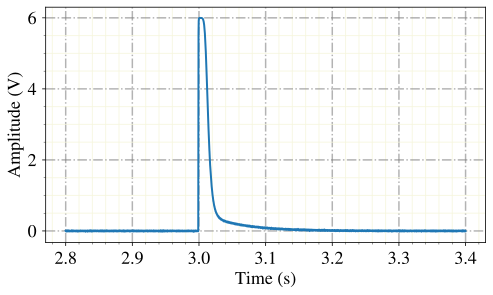

Get 15000 samples from sample 139998.0.
Create time array from 2.7999600000000004 to 3.3999200000000003 seconds.
Plot.


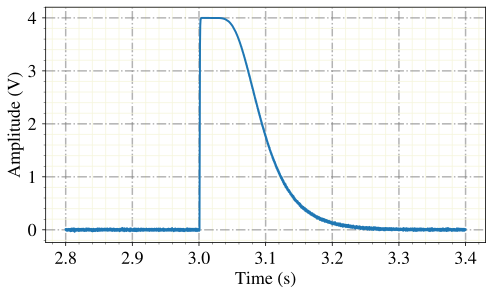

In [3]:
# ---------------------------------------------------------
# CSMPL
# ---------------------------------------------------------
test_data._generate_csmpl_files()
ai.trigger.plot_csmpl(path='test_data/mock_001_Ch0.csmpl', start_time=2.8, end_time=3.4, dpi=150)
ai.trigger.plot_csmpl(path='test_data/mock_001_Ch1.csmpl', start_time=2.8, end_time=3.4, dpi=150)

In [4]:
# ---------------------------------------------------------
# SQL
# ---------------------------------------------------------
test_data._generate_sql_file()
# test by opening with other viewer!

Sql file written.


In [5]:
# ---------------------------------------------------------
# DIG
# ---------------------------------------------------------
test_data._generate_dig_stamps()
dh = ai.DataHandler()
dh.checkout_dig(path_dig='test_data/mock_001.dig_stamps', read_events=5)

Dig_stamps file written.
DataHandler Instance created.
stamp, bank, _
(404204800, 0, 0)
(820409600, 0, 0)
(1236614400, 0, 0)
(1652819200, 0, 0)
(2069024000, 0, 0)


In [6]:
# ---------------------------------------------------------
# TEST
# ---------------------------------------------------------
test_data._generate_test_stamps()
dh = ai.DataHandler()
dh.checkout_test(path_test='test_data/mock_001.test_stamps', read_events=5)

Test_stamps file written.
DataHandler Instance created.
stamp, tpa, tpch
(42000000, 20., 0)
(72000000, 0.1, 0)
(102000000, -1., 0)
(132000000, 20., 0)
(162000000, 0.3, 0)


## Trigger

First get the optimum filter transfer function from the hardware data file.

In [13]:
dh_hw = ai.DataHandler()
dh_hw.set_filepath(path_h5='test_data/', fname='test_001', appendix=False)

DataHandler Instance created.


In [4]:
of_r = dh_hw.get(group='optimumfilter', dataset='optimumfilter_real_down16')
of_i = dh_hw.get(group='optimumfilter', dataset='optimumfilter_real_down16')
of = of_r + 1j*of_i

In [2]:
dh_stream = ai.DataHandler()
dh_stream.set_filepath(path_h5='test_data/', fname='stream_001')

DataHandler Instance created.


In [6]:
dh_stream.include_csmpl_triggers(csmpl_paths=['test_data/mock_001_Ch0.csmpl', 'test_data/mock_001_Ch1.csmpl'],
                                 thresholds=[0.02, 0.02],
                                 of=of,
                                 path_sql='test_data/mock_001.db',
                                 csmpl_channels=[0,1],  # the channel numbers in the csmpl file are different from rdt
                                 sql_file_label='mock_001',
                                 down=16,
                                 )

TRIGGER CHANNEL  0
#######################################
CURRENT STREAM NMBR 0 PATH test_data/mock_001_Ch0.csmpl
TOTAL LENGTH STREAM:  45000000
nmbr triggers: 100, finished: 19.32%
nmbr triggers: 200, finished: 38.65%
nmbr triggers: 300, finished: 57.82%
nmbr triggers: 400, finished: 77.16%
nmbr triggers: 500, finished: 96.32%
#######################################
DONE WITH ALL FILES FROM THIS CALL.
Triggers:  518
TRIGGER CHANNEL  1
#######################################
CURRENT STREAM NMBR 0 PATH test_data/mock_001_Ch1.csmpl
TOTAL LENGTH STREAM:  45000000
nmbr triggers: 100, finished: 40.15%
nmbr triggers: 200, finished: 74.82%
#######################################
DONE WITH ALL FILES FROM THIS CALL.
Triggers:  268
ALIGN TRIGGERS
ADD DATASETS TO HDF5
DONE


In [3]:
dh_stream.include_test_stamps(path_teststamps='test_data/mock_001.test_stamps',
                              path_dig_stamps='test_data/mock_001.dig_stamps', 
                              path_sql='test_data/mock_001.db', 
                              csmpl_channels=[0,1], 
                              sql_file_label='mock_001')

Test Stamps included.


In [3]:
dh_stream.include_triggered_events(csmpl_paths=['test_data/mock_001_Ch0.csmpl', 'test_data/mock_001_Ch1.csmpl'],
                                   max_time_diff=0.03, # in sec
                                   exclude_tp=True,
                                   sample_duration=0.00004,
                                   datatype='float32',
                                   min_tpa=0.001,
                                   min_cpa=10.1,
                                   down=1)

An events group exists in this file. Overwrite? y/ny
Exclude Testpulses.
Include the triggered events.
Channel  0
Get Event Nmbr  0
Channel  1
Get Event Nmbr  0
Include Testpulse Events.
Channel  0
Calc Pulse Nmbr  0
Channel  1
Calc Pulse Nmbr  0
Calculate Control Pulse Heights.
Channel  0
Calc Pulse Nmbr  0
Channel  1
Calc Pulse Nmbr  0
DONE


In [4]:
dh_stream.calc_mp()

CALCULATE MAIN PARAMETERS.


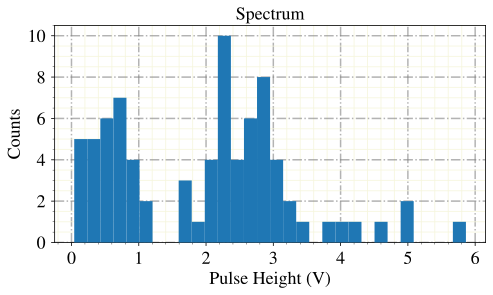

In [9]:
channel=0

dh_stream.show_values(group='events', key='mainpar', bins=30, idx0=channel, idx2=0,
               xlabel='Pulse Height (V)', ylabel='Counts', title='Spectrum')

In [14]:
dh_stream.include_sev(sev=dh_hw.get('stdevent','event'), 
                      fitpar=dh_hw.get('stdevent','fitpar'), 
                      mainpar=dh_hw.get('stdevent','mainpar'))

Write SEV


In [15]:
dh_stream.include_nps(nps=dh_hw.get('noise','nps'))

Write NPS


In [16]:
dh_stream.include_of(of_real=dh_hw.get('optimumfilter','optimumfilter_real'), 
                     of_imag=dh_hw.get('optimumfilter','optimumfilter_imag'))

Write OF


In [17]:
dh_stream.include_of(of_real=dh_hw.get('optimumfilter','optimumfilter_real_down16'), 
                     of_imag=dh_hw.get('optimumfilter','optimumfilter_imag_down16'), 
                     down=16)

Write OF


### View Triggered Events

In [10]:
ei = ai.EventInterface(nmbr_channels=2)
ei.load_h5(path='test_data/', fname='stream_001', channels=[0,1], appendix=True, which_to_label=['events'])
ei.create_labels_csv(path='test_data/')

Event Interface Instance created.
Nmbr triggered events:  79
Nmbr testpulses:  240
No noise in h5 file.
HDF5 File loaded.


Start labeling from idx 0.
Labels autosave to test_data/labels_stream_001_.


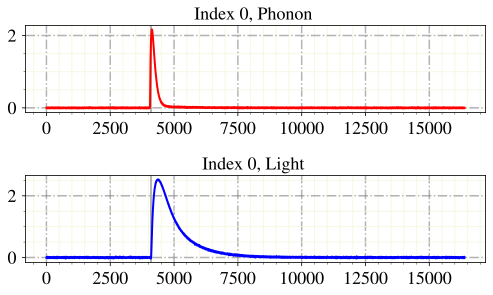

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 0 Phonon (q end, b back, n next, o options, i idx)
Phonon: n
Skipping this label.


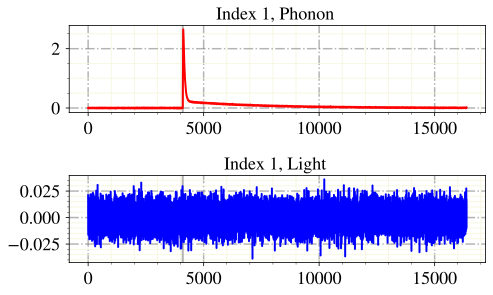

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 1 Phonon (q end, b back, n next, o options, i idx)
Phonon: n
Skipping this label.


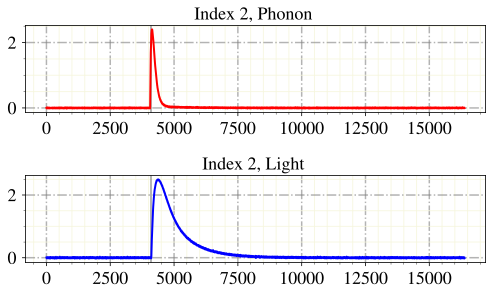

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 2 Phonon (q end, b back, n next, o options, i idx)
Phonon: n
Skipping this label.


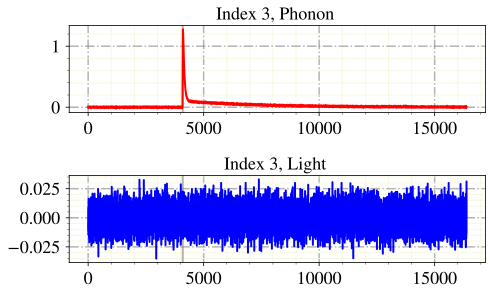

Label Phonon: 0.0
Label Light: 0.0
Assign label for event idx: 3 Phonon (q end, b back, n next, o options, i idx)
Phonon: q
End labeling.


In [11]:
ei.start(start_from_idx=0, print_label_list=False)